# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

***Описание данных***

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

# Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/data.csv')

In [3]:
data = pd.read_csv('datasets/data.csv')

In [4]:
# Первые пять строк табицы данных
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [5]:
# Общая информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
# Общая статистика по столбцам с числовым типом данных
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [7]:
# Общая статистика по столбцам со строковым типом данных
data.describe(include='object')

,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,среднее,женат / замужем,F,сотрудник,свадьба
freq,13750,12380,14236,11119,797


In [8]:
# Уникальные значения по столбцам со строковым типом данных
object_columns = list(data.select_dtypes(include='object').columns)
for _ in object_columns:
    print(_, '\n', data[_].unique(),'\n')

education 
 ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень'] 

family_status 
 ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем'] 

gender 
 ['F' 'M' 'XNA'] 

income_type 
 ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете'] 

purpose 
 ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жи

## Вывод

Таблица данных содержит 12 столбцов и более 21 тыс. строк. Предварительно можно утверждать, что, данных достаточно для проверки гипотез. В каждой строке таблицы содержится информация о конкретном заемщике.  
В столбцах `days_employed` и `total_income` имеются пропуски.  
Из статистики по столбцам можно выделить следующие особенности набора данных:  
* Медианное количество детей в семье составляет 0, т.е. заемщики в основной массе люди без детей. Минимальное значение количества детей в семье: -1, т.е. отрицательное число, что свидетельствует о наличии некорректных значений в данном столбце. Максимальное количество детей в семье: 20, также требует внимания, т.к. значение слишком большое.
* Столбец с общим трудовым стажем в основном состоит из отрицательных значений, что наталкивает на мысль об ошибочности знака "минус" в данных. Однако имеются и положительные значения, причем максимальное значение столбца составляет 401 755 дней, что примерно равно 1 101 году. Таким образом, столбец содержит различные виды ошибок.
* Возраст заемщиков содержит нулевые значения.
* Месячный доход заемщиков изменяется от 20 до 226 тыс. у.е., среднее значение составляет - 167 тыс.у.е., медианное значение - 145 тыс. у.е. В столбце отсутствуют нулевые значения, однако имеются пропуски.
* Столбец с уровнем образования имеет 15 категорий, столбец с целями кредита насчитывает 38 категорий -  в данных столбцах имеется большое количество дублей. 
* Столбец с полом имеет 3 уникальных значения, из-за неявного пропуска вида 'XNA'.

# Предобработка данных
## Удаление пропусков и обработка аномальных значение

In [9]:
# Количество пропущенных значений для каждого столбца
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Количество пропусков в столбцах с трудовым стажем и ежемесячным доходом совпадают. Можно предположить, что пропуски взаимосвязаны друг с другом, т.е. пропуск в столбце трудового стажа соответствует пропуску в столбце с ежемесячным доходом. Выясним, так ли это:

In [10]:
(data['days_employed'].isna() == data['total_income'].isna()).value_counts()

True    21525
dtype: int64

### ['income_type']

Предположим, что пропуски в графах 'days_employed'(общий трудовой стаж) и 'total_income'(ежемесячный доход) в количестве 2174 строк относятся к клиентам, которые никогда не работали. Для проверки гипотезы посчитаем количество уникальных наименований в колонке "income_type"

In [11]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

В даных только 2 безработных, 1 студент и 1 человек в декрете. Гипотеза не подтвердилась, следовательно пропуски обусловлены иными причинами. Поскольку пропущенные данные носят количественный характер, заполним их характерными значениями с помощью метода median(). Данный метод лучше подходит для расчета среднего дохода.

При этом, будем использовать группировку уровня дохода в зависимости от типа занятости (income type)

Для начала проверим, действительно ли зависит средний доход от типа занятости.

In [12]:
data.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Гипотеза подтвердилась, доход завист от графы с типом занятости. Заменим пропуски в зависимости от типа занятости медианными значениями.

In [13]:
incom_median = data.groupby('income_type')['total_income'].median()
for i in range(len(incom_median)):
    data.loc[(data['income_type'] == incom_median.index[i]) & (data['total_income'].isnull()) , 'total_income'] = incom_median[i]

На этапе изучения общей информации мы определили, что столбец days_employed содержит отрицательные значения трудового стажа, а также нереалистичные значения, превышающие 1000 лет. Проанализируем столбец подробнее

In [14]:
data.days_employed.median()

-1203.369528770489

In [15]:
print(f'Процент отрицательных значений трудового стажа {data[data.days_employed < 0]["days_employed"].count() / data.shape[0]:.0%}')
print(f'Процент незаполненных значений трудового стажа {data[data.days_employed.isna()].shape[0] / data.shape[0]:.0%}')

Процент отрицательных значений трудового стажа 74%
Процент незаполненных значений трудового стажа 10%


In [16]:
# Статистика по положительным значениям
print(f'Среднее значение трудового стажа в годах среди положительных значений {int(data[data.days_employed > 0]["days_employed"].mean() / 365)} лет')

Среднее значение трудового стажа в годах среди положительных значений 1000 лет


Таким образом, большая часть столбца days_employed заполнена отрицательными значениями или имею пропуски, а положительные значения трудового стажа имеют аномально высокие значения. Данный столбец лучше удалить из наших данных.

In [17]:
data.drop('days_employed', axis=1, inplace=True)

In [18]:
# Проверим отсутствие пропусков в очищенном датафрейме
data.isna().sum()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Проанализируем и обработаем остальные обнаруженные нами неявные пропуски и некорректные значения.

### ['children']

In [19]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Столбец с количеством детей содержит 47 строк со значением (-1). Возможно ошибочно проставлен знак "минус". Однако выяснить это мы не можем, а процент отрицательных значений составляет около  0,2% от общего количества строк, поэтому удаление этих строк будет приемлимым решением в данном случае.  
Обращает внимание также факт наличия в таблице данных о семьях с 20 детьми. Это вероятно также ошибочные данные, семьи с 20 детьми были бы уникальными, единичными случаями, а в нашем датафрейми их количество - 76, что превышает количество семей с четырьмя и пятью детьми. При этом в таблице нет данных о семьях с количеством детей от 6 до 19. Возможно таким образом были сгруппированы семьи с количеством детей более пяти или ошибочно появился лишний ноль после значения 2. В документации информации об этом нет, возможность уточнить также отсутствует. Примем решение об удалении этих строк. Процент таких строк составялет около 0,3% от общего количества.

In [20]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

### ['dob_years']

При изучении общей информации по данным было замечено, что возраст заемщиков содержит нулевые значения. Проанализируем столбец dob_years подробнее:

In [21]:
data['dob_years'].value_counts().sort_index()

0     100
19     14
20     51
21    110
22    183
23    252
24    263
25    356
26    406
27    490
28    501
29    543
30    536
31    556
32    506
33    577
34    597
35    614
36    553
37    531
38    595
39    572
40    603
41    603
42    592
43    510
44    543
45    494
46    469
47    480
48    536
49    505
50    509
51    446
52    483
53    457
54    476
55    441
56    482
57    457
58    461
59    441
60    376
61    353
62    351
63    268
64    263
65    194
66    183
67    167
68     99
69     83
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

В столбце dob_years содержится 100 нулевых значения, других выбивающихся значений в столбце нет. Количество строк с нулевым возрастом сравнительно небольшое по отношению к объему датасета, вероятно это отсутствующие значения заполнены таким образом, удалим эти строки, т.к. возраст представляется важным прогностическим признаком и заполнение его типичными значениями может привести к снижению точности модели кредитного скорринга.

In [22]:
data = data.query('dob_years != 0')

### ['gender']

Рассмотрим столбец с полом клиентов

In [23]:
data['gender'].value_counts()

F      14083
M       7218
XNA        1
Name: gender, dtype: int64

Имеется всего одно аномальное значение в столбце gender, удалим эту строку.

In [24]:
data = data.drop(data[data['gender'] == 'XNA'].index)

In [25]:
# Общая информация по датафрейму после обработки всех пропусков и некорректных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21301 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21301 non-null  int64  
 1   dob_years         21301 non-null  int64  
 2   education         21301 non-null  object 
 3   education_id      21301 non-null  int64  
 4   family_status     21301 non-null  object 
 5   family_status_id  21301 non-null  int64  
 6   gender            21301 non-null  object 
 7   income_type       21301 non-null  object 
 8   debt              21301 non-null  int64  
 9   total_income      21301 non-null  float64
 10  purpose           21301 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод
В ходе этапа по обработке пропусков были выполнены следующие операции очистки данных:  
 * пропуски в столбце с ежемесячным доходом заполнены типичными (медианными) значениями в зависимости от типа занятости клиента,
 * столбец с трудовым стажем полностью удален из датасета вследствие наличия разнотипных ошибок и практически полной непригодности для обработки,
 * удалены строки содержащие ошибочные данные в столбцах с количеством детей, полом и возрастом.  

Количество строк в очищенном датасте составляет 21 301, что на 224 строк меньше изначальной таблицы, т.е. был удален примерно 1% данных.

## Изменение типов данных

In [26]:
# Типы данных по столбцам
data.dtypes

children              int64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

В данных остался один столбец total_income с вещественным типом данных, потребности в высокой точности и сохранения дробной части числа у нас нет, для удобства преобразуем столбец ежемесячный дохода в целичисленный тип.

In [27]:
data['total_income'] = data['total_income'].astype(int)

### Вывод

Тип данных столбца с ежемесячным доходом заемщиков преобразован с вещественного на целочисленный.

## Обработка дубликатов

Определим количество и удалим строки с полными дублями в данных

In [28]:
# Количество полных дублей
data.duplicated().sum()

54

In [29]:
# Удалим дублирующиеся строки
data.drop_duplicates(inplace=True)

На этапе рассмотрения общей информации было отмечено наличие неявных дубликатов в из-за использования различного регистра. Для обработки дубликатов в данном столбце приведем все символы к нижнему регистру.

In [30]:
for _ in object_columns:
    data[_] = data[_].str.lower()

In [31]:
data.duplicated().sum()

17

Выявлено ещё 17 дубликатов

In [32]:
# Удалим дублирующиеся строки
data.drop_duplicates(inplace=True)

### Вывод
На данном этапе  были выялены и удалены полностью дублирующиеся строки, а также обработаны неявные дубли, связанные с заполнением данных с использованием разного регистра символов.

## Категоризация данных
### ['total_income_category']

На основании диапазонов доходов заемщиков, указанных ниже, создадим в датафрейме data столбец total_income_category с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [33]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [34]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

### ['purpose_category']

Выведим перечень уникальных целей взятия кредита из столбца purpose.

In [35]:
data['purpose'].nunique()

38

In [36]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

* 'операции с автомобилем',
* 'операции с недвижимостью',
* 'проведение свадьбы',
* 'получение образования'.

In [37]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [38]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [39]:
data['purpose_category'].unique()

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

### ['children_category']

In [40]:
# Количество уникальных значений по столбцу `children`
data['children'].value_counts()

0    14021
1     4792
2     2039
3      328
4       41
5        9
Name: children, dtype: int64

Из распределения видно, что в выборке сравнительно мало семей с четырьмя и пятью детьми. Их количество может оказаться недостаточным для формулировки выводов.  
Представляется логичным объединение семей с 3, 4 и 5 детьми в одну группу - более 2-х детей.

In [41]:
def children_category(children):
    '''
    Функция возвращает группу по количеству детей children:
    - 'нет детей', если children = 0;
    - '1 ребенок', если children = 1;
    - '2 детей', если children = 2;
    - 'более 2-х детей', если children > 2;
    '''    
    if children == 0:
        return 'нет детей'
    if children == 1:
        return '1 ребенок'
    if children == 2:
        return '2 детей'
    return 'более 2-х детей'

In [42]:
data['children_category'] = data['children'].apply(children_category)
data['children_category'].value_counts()

нет детей          14021
1 ребенок           4792
2 детей             2039
более 2-х детей      378
Name: children_category, dtype: int64

Группа с количеством детей более 2-х сравнительно малочисленна, однако еще большее укрупнение групп может негативно сказаться на качестве модели.

### ['age_category']

In [43]:
# Количество уникальных значений по столбцу 'dob_years'
data['dob_years'].value_counts()

35    613
41    601
40    601
34    595
38    594
42    591
33    577
39    571
31    555
36    552
29    542
44    541
48    534
30    533
37    530
43    509
50    508
49    505
32    505
28    501
45    493
27    490
52    483
56    478
47    477
54    473
46    466
53    457
58    454
57    453
51    444
55    441
59    440
26    406
60    373
25    356
61    352
62    347
63    268
24    262
64    258
23    250
65    193
22    183
66    182
67    167
21    110
68     99
69     83
70     65
71     56
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [44]:
# Функция для группировки заемщиков по возрасту
def age_category(age):
    if age < 25:
        return 'до 25 лет'
    if 25 <= age < 35:
        return 'от 25 до 35 лет'
    if 35 <= age < 45:
        return 'от 35 до 45 лет'
    if 45 <= age < 55:
        return 'от 45 до 55 лет'
    if 55 <= age < 65:
        return 'от 55 до 65 лет'
    return 'более 65 лет'

In [45]:
data['age_category'] = data['dob_years'].apply(age_category)
data['age_category'].value_counts()

от 35 до 45 лет    5703
от 25 до 35 лет    5060
от 45 до 55 лет    4840
от 55 до 65 лет    3864
более 65 лет        893
до 25 лет           870
Name: age_category, dtype: int64

Каждая группа по возрасту получилась достаточно представительной, такую категоризацию можно оставить для использования в модели.

### ['education']

In [46]:
# Распределение заемщиков по уровню образования
data['education'].value_counts()

среднее                15012
высшее                  5192
неоконченное высшее      738
начальное                282
ученая степень             6
Name: education, dtype: int64

Количество заемщиков с ученой степенью слишком мало, всего шесть человек. Укрупним категорию с высшим образованием, включив в нее также группу с ученой степенью. Произведем замену в столбце education без добавления нового столбца.

In [47]:
data.loc[data['education'] == 'ученая степень', 'education'] = 'высшее'
data['education'].value_counts()

среднее                15012
высшее                  5198
неоконченное высшее      738
начальное                282
Name: education, dtype: int64

### ['income_type']

In [48]:
# Распределение заемщиков по типу занятости
data['income_type'].value_counts()

сотрудник          10961
компаньон           5026
пенсионер           3792
госслужащий         1445
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Категории "безработный", "студент", "в декрете", "предприниматель" представлены в единичном количестве.  
Требует уточнения понятие "компаньон", т.к. оно не характерно для российской практики, вероятнее всего под этим понятием имеются ввиду владельцы/совладельцы компаний. Тогда с небольшой натяжкой можно отнести единственного "предпринимателя" в эту категорию, а остальные категории удалим, т.к. из них не получится собрать представительную выборку даже если объединить в одну категорию, например 'прочие'.

In [49]:
data.loc[data['income_type'] == 'предприниматель', 'income_type'] = 'компаньон'
list_income = ['сотрудник', 'компаньон', 'пенсионер', 'госслужащий']
data = data.query('income_type.isin(@list_income)',engine='python')

In [50]:
data['income_type'].value_counts()

сотрудник      10961
компаньон       5028
пенсионер       3792
госслужащий     1445
Name: income_type, dtype: int64

Удалим из таблицы лишние столбцы на основании которых мы проводили категоризацию, оставив только соответствующие им категории

In [51]:
data_category = data.drop(['children', 'dob_years', 'education_id', 'family_status_id', 'gender', 'total_income', 'purpose'], axis=1)

In [52]:
data_category.head()

,education,family_status,income_type,debt,total_income_category,purpose_category,children_category,age_category
0,высшее,женат / замужем,сотрудник,0,B,операции с недвижимостью,1 ребенок,от 35 до 45 лет
1,среднее,женат / замужем,сотрудник,0,C,операции с автомобилем,1 ребенок,от 35 до 45 лет
2,среднее,женат / замужем,сотрудник,0,C,операции с недвижимостью,нет детей,от 25 до 35 лет
3,среднее,женат / замужем,сотрудник,0,B,получение образования,более 2-х детей,от 25 до 35 лет
4,среднее,гражданский брак,пенсионер,0,C,проведение свадьбы,нет детей,от 45 до 55 лет


### Вывод

Была произведена категоризация числовых признаков: количество детей, возраст заемщиков, ежемесячный доход.  
Укрупнены категориальные данные: целей взятия кредита, образование, занятость.

# Исследование надежности заемщиков по категориям

## Зависимость между наличием детей и возвратом кредита в срок

In [53]:
data_category

,education,family_status,income_type,debt,total_income_category,purpose_category,children_category,age_category
0,высшее,женат / замужем,сотрудник,0,B,операции с недвижимостью,1 ребенок,от 35 до 45 лет
1,среднее,женат / замужем,сотрудник,0,C,операции с автомобилем,1 ребенок,от 35 до 45 лет
2,среднее,женат / замужем,сотрудник,0,C,операции с недвижимостью,нет детей,от 25 до 35 лет
3,среднее,женат / замужем,сотрудник,0,B,получение образования,более 2-х детей,от 25 до 35 лет
4,среднее,гражданский брак,пенсионер,0,C,проведение свадьбы,нет детей,от 45 до 55 лет
...,...,...,...,...,...,...,...,...
21520,среднее,гражданский брак,компаньон,0,B,операции с недвижимостью,1 ребенок,от 35 до 45 лет
21521,среднее,женат / замужем,пенсионер,0,C,операции с автомобилем,нет детей,более 65 лет
21522,среднее,гражданский брак,сотрудник,1,C,операции с недвижимостью,1 ребенок,от 35 до 45 лет
21523,среднее,женат / замужем,сотрудник,1,B,операции с автомобилем,более 2-х детей,от 35 до 45 лет


In [54]:
# считаем среднее значение доли задолженности по возврату кредитов в каждой группе по количеству детей в семье
data_bebt_children = data_category.groupby('children_category').agg({'debt':['mean', 'count']})

In [55]:
# переводим среднее значение доли задолженности в процентное выражение 
data_bebt_children = data_bebt_children.xs('debt', axis=1, level=0)
data_bebt_children['mean'] = (data_bebt_children['mean'] * 100).round(1)
data_bebt_children

,mean,count
children_category,,
1 ребенок,9.2,4791
2 детей,9.5,2038
более 2-х детей,8.2,378
нет детей,7.5,14019


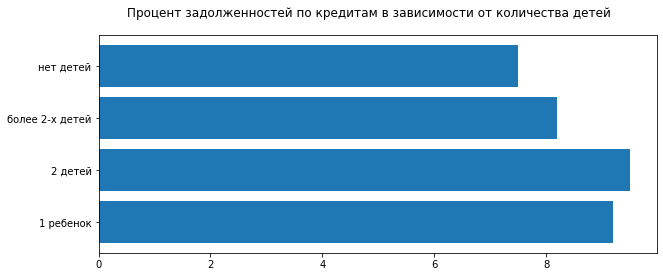

In [56]:
plt.figure(figsize=(10,4))
plt.barh(data_bebt_children.index, data_bebt_children['mean'])
plt.suptitle("Процент задолженностей по кредитам в зависимости от количества детей");

### Вывод

Лучше всего с возвращаемостью обстоит дело у клиентов без детей (процент невозвратов 7,5%), хуже всего у клиентов с 2-мя детьми (9,5%) и с 1 ребенком (9,2%). При количестве детей более двух - процент невозвратов составляет 8,2%, т.е. лучше чем у клиентов с одним или двумя детьми, но хуже чем у клиентов без детей. Это может быть связано с тем, что больше двух детей заводят в основном более состоятельные и соответственно, кредитоспособные, люди. Также причина может быть связана с малым объемом выборки для данной категории, и соответственно, ее возможной нерепрезентативностью.

## Зависимость между семейным положением и возвратом кредита в срок

In [57]:
# считаем среднее значение доли задолженности по возврату кредитов в каждой группе по количеству детей в семье
data_bebt_family_status = data_category.groupby('family_status').agg({'debt':['mean', 'count']})
data_bebt_family_status = data_bebt_family_status.xs('debt', axis=1, level=0)
data_bebt_family_status['mean'] = (data_bebt_family_status['mean'] * 100).round(1)
data_bebt_family_status

,mean,count
family_status,,
в разводе,7.1,1179
вдовец / вдова,6.6,946
гражданский брак,9.3,4111
женат / замужем,7.5,12211
не женат / не замужем,9.8,2779


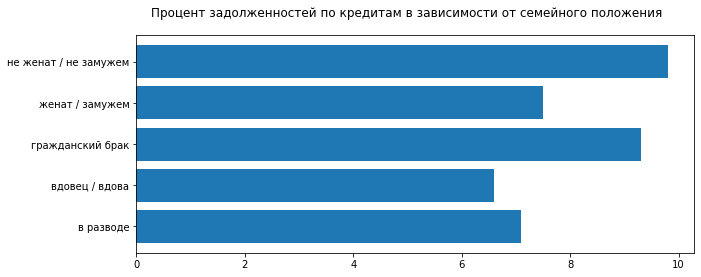

In [58]:
plt.figure(figsize=(10,4))
plt.barh(data_bebt_family_status.index, data_bebt_family_status['mean'])
plt.suptitle("Процент задолженностей по кредитам в зависимости от семейного положения");

### Вывод

Лучше всего с возвращаемостью кредитов в срок обстоят дела у вдов/вдовцов (невозврат - 6,6%) и клиентов, находящихся в разводе (невозврат - 7,1%). Больше всего проблем с возвратом кредитов у клиентов не состоявших в браке (9,8 %) и клиентов, состоящих в гражданском браке (9,3%). Вероятно такая связь кореллирует с возрастом, логично предположить, что вдовы/вдовцы это наиболее пожилые клиенты; клиенты, находящиеся в разводе - скорее всего из категории пожилых и средних лет, уже имеющие опыт семейной жизни и успевшие развестись; клиенты находящиеся в гражданском браке - вероятно, в основной массе, молодые люди и люди средних лет, еще не успевшие зарегестрировать отношения; а клиенты никогда не состоявшие в браке - это наиболее молодая категория клиентов.  
Основная категория клиентов, состоит в официальных отношениях и имеет процент невозвратов на уровне 7,5%

## Зависимость между возрастом и возвратом кредита в срок

In [60]:
# считаем среднее значение доли задолженности по возврату кредитов в каждой группе по количеству детей в семье
data_bebt_age = data_category.groupby('age_category').agg({'debt':['mean', 'count']})
data_bebt_age = data_bebt_age.xs('debt', axis=1, level=0)
data_bebt_age['mean'] = (data_bebt_age['mean'] * 100).round(1)
data_bebt_age

,mean,count
age_category,,
более 65 лет,5.5,893
до 25 лет,10.1,869
от 25 до 35 лет,11.0,5059
от 35 до 45 лет,8.3,5702
от 45 до 55 лет,7.1,4839
от 55 до 65 лет,5.5,3864


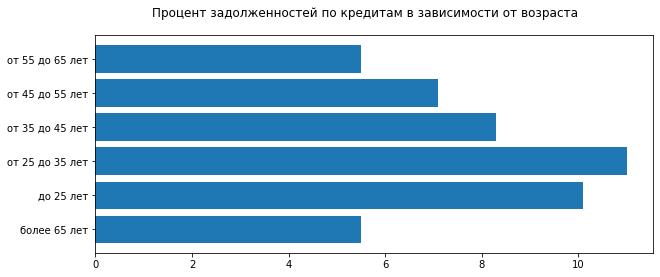

In [61]:
plt.figure(figsize=(10,4))
plt.barh(data_bebt_age.index, data_bebt_age['mean'])
plt.suptitle("Процент задолженностей по кредитам в зависимости от возраста");

### Вывод

Как видим, существует достаточно четкая связь между возрастом и возвращаемостью кредитов. Наилучшая возвращаемость у клиентов старше 55 лет. Больше всего невозвратов у клиентов моложе 35 лет.

## Зависимость между целью кредита и его возвратом в срок

In [67]:
# считаем среднее значение доли задолженности по возврату кредитов от цели кредита
data_bebt_purpose_category = data_category.groupby('purpose_category').agg({'debt':['mean', 'count']})
data_bebt_purpose_category = data_bebt_purpose_category.xs('debt', axis=1, level=0)
data_bebt_purpose_category['mean'] = (data_bebt_purpose_category['mean'] * 100).round(1) # средний процент просрочек
data_bebt_purpose_category

,mean,count
purpose_category,,
операции с автомобилем,9.3,4257
операции с недвижимостью,7.3,10700
получение образования,9.3,3970
проведение свадьбы,7.9,2299


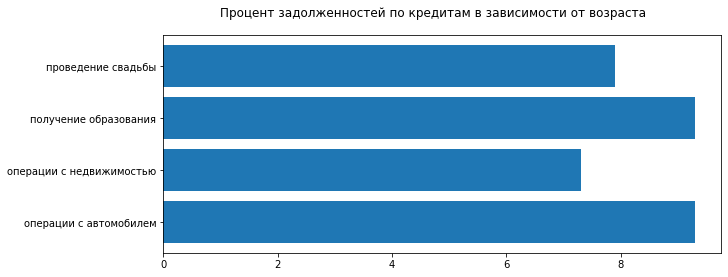

In [68]:
plt.figure(figsize=(10,4))
plt.barh(data_bebt_purpose_category.index, data_bebt_purpose_category['mean'])
plt.suptitle("Процент задолженностей по кредитам в зависимости от возраста");

### Вывод

Наибольший процент невозвратов в срок у кредитов взятых для целей "образование" и "автомобиль" - по 9,3% , наименьший процент невозвратов у кредитов, взятых под цели "недвижимость" - 7,3%. Возможно это связано с тем, что для приобретения недвижимости берутся существенно большие суммы по сравнению с другими и, соответственно, клиенты подвергаются более жесткой проверке на предмет кредитоспособности.

## Зависимость между уровнем дохода и возвратом кредита в срок

In [69]:
# считаем среднее значение доли задолженности по возврату кредитов от дохода
data_total_income_category = data_category.groupby('total_income_category').agg({'debt':['mean', 'count']})
data_total_income_category = data_total_income_category.xs('debt', axis=1, level=0)
data_total_income_category['mean'] = (data_total_income_category['mean'] * 100).round(1)
data_total_income_category

,mean,count
total_income_category,,
A,8.0,25
B,7.1,4986
C,8.5,15846
D,6.1,347
E,9.1,22


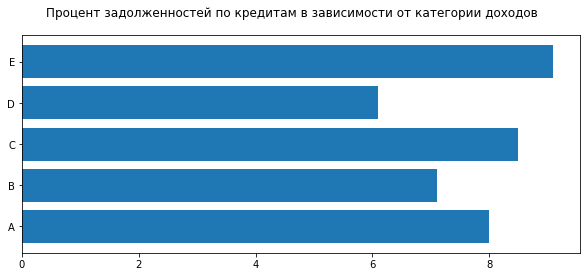

In [70]:
plt.figure(figsize=(10,4))
plt.barh(data_total_income_category.index, data_total_income_category['mean'])
plt.suptitle("Процент задолженностей по кредитам в зависимости от категории доходов");

### Вывод

Из распределения видно, что в выборке сравнительно лиц с доходами A (выше 1 млн р.) и E (менее 30 тыс. р.). Их количество может оказаться недостаточным для формулировки выводов.  
Наибольший риск в массовых группах - C (от 50 до 200 тыс. р.) 

# Анализ групп

In [89]:
# Доля задержек по всей выборке
print(f'Средний процент просрочек по выборке {data.debt.mean():.1%}')

Средний процент просрочек по выборке 8.1%


Наиболее надежными заемщиками являются:
- группе по количеству детей в семье: не имеющие детей
- по возрасту старше 55 лет
- по категории семейного положения: вдовец / вдова
- по категории дохода:от 30001 до 50000 и от 200001 до 1000000 руб.
- категории цель кредите: операции с недвижимостью и проведение свадьбы

In [90]:
#Сделаем фильтрацию надежных заемщиков
data_profit = data[(data['children'] == 0) & 
              (data['family_status'] == 'вдовец / вдова') & 
              ((data['total_income_category'] == 'B') | (data['total_income_category'] == 'D')) & 
              ((data['purpose_category'] == 'операции с недвижимостью') | (data['purpose_category'] == 'проведение свадьбы'))]

In [91]:
# Количество таких заемщиков
data_profit.shape[0]

88

In [92]:
# Доля задержек в надежных заемщиков
print(f'Процент просрочек в надежной группе заемщиков {data_profit.debt.mean():.1%}')

Процент просрочек в надежной группе заемщиков 3.4%


Наиболее рискованными заемщиками являются:

- группе по количеству детей в семье: 1 или 2 ребенка
- по категории семейного положения: не женат/не замужем и гражданский брак
- по категории дохода:от 50001 до 200000 руб.
- категории цель кредите: получение образования и операции с автомобилем

In [93]:
#Сделаем фильтрацию рискованных заемщиков
data_risk = data[((data['children'] == 1) | (data['children'] == 2)) & 
                 ((data['family_status'] == 'Не женат / не замужем') | (data['family_status'] == 'гражданский брак')) & 
                  (data['total_income_category'] == 'C') & 
                  ((data['purpose_category'] == 'получение образования') | (data['purpose_category'] == 'операции с автомобилем'))]

In [94]:
# Количество таких заемщиков
data_risk.shape[0]

203

In [95]:
# Доля задержек в данной группе
print(f'Процент просрочек в рискованной группе заемщиков {data_risk.debt.mean():.1%}')

Процент просрочек в рискованной группе заемщиков 18.2%


Средняя процент задержек по всем выданным кредитам 8,1%

В выявленной группе надежных заемщиков 3,4%

В выявленной группе рискованных заемщиков 18,2%

В группах выявлено заметное отличие. Результаты исследования можно использовать при оценках выдачи кредитов.

# Общий вывод

В работе проанализирован набор данных по заемщикам (21525 записей).

<b><big>Проведена предобработка данных </big></b>

<b><i>Удаление пропусков</i></b>

пропущенные значения ежемесячного дохода заменены медианной величиной. Всего было заполнено 2174 пропусков.

<b><i>Обработка аномальных значений</i></b>

отрицательные значения величины трудовой стажа, преобразованы в положительные. После чего пропущенные значения трудового стада заполнены медианным значением.

Удалены 123 записи с аномальными значенияки количества детей в семье.

<b><i>Обработка дубликатов</i></b>

Найдены и убраны 71 дублирующиеся записи.

<b><i>Категоризация данных</i></b>

Для упрощения анализа данных ежемесячные доходы группированы по 5 категориям.  

- A - 1000001 и выше
- B - от 200001 до 1000000
- C - от 50001 до 200000
- D - от 30001 до 50000
- E - до 30000 руб.

Имеющихся 38 целей получения кредитов приведены к 4 категориям:

- операции с автомобилем,
- операции с недвижимостью,
- проведение свадьбы,
- получение образования

<b><big>Выводы</big></b>

<b>В среднем процент задержек по всем выданным кредитам 8,1%</b>


<b>Выявлена группа надежных заемщиков с задержкой оплат 3,4%</b>

Наиболее надежными заемщиками являются:
- семьи не имеющие детей
- старше 55 лет
- вдовец / вдова
- по категории дохода:от 30001 до 50000 и от 200001 до 1000000 руб.
- категории цель кредите: операции с недвижимостью и проведение свадьбы


<b>Выявлена группа рискованных заемщиков 18,2%</b>

Наиболее рискованными заемщиками являются:

- семьи с детьми
- не состоявшие в браке либо ливущие в гражданском браке
- с ежемесячным доходом от 50001 до 200000 руб.
- при получении кредитов на образования или приобретении автомобиля

<b><big>Рекомендации </big></b>

Признак: трудовой стажем полностью удален из анализа вследствие наличия пропусков, разнотипных ошибок и практически полной непригодности для обработки (аномально высокие значения трудового стажа). Рекомендуется проработать данные по трудовому стажу, так как трудовой стаж тоже может влиять на долю просрочек по платежам.

Использовать характеристики выявленные в группах надежных и рискованных заемщиков для дифференцации условий выдачи кредита.